In [1]:
import json
import os
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math

###  Population

In [249]:
polulationfile = "Population_2017.csv"
records = []
with open(polulationfile,"r") as file:
    reader = csv.reader(file,delimiter = ',')
    for row in reader:
        records.append(row)
    
columns = records[0]
records = records[1:]

In [89]:
print(columns)

['state_code', ' gccsa_code16', ' gccsa_name16', ' persons_total', ' state_name']


In [250]:
city_name = []
state_name = []
for i in range(len(records)):
    city_name.append(records[i][2])
    state_name.append(records[i][4])

states = list(set(state_name))
cities = list(set(city_name))
print(states)
print(cities)

['New South Wales', 'Tasmania', 'Queensland', 'Australian Capital Territory', 'Northern Territory', 'Western Australia', 'South Australia', 'Victoria']
['Greater Hobart', 'Rest of NT', 'Greater Sydney', 'Rest of SA', 'Greater Brisbane', 'Greater Perth', 'Rest of NSW', 'Greater Adelaide', 'Greater Melbourne', 'Rest of Tas.', 'Rest of Qld', 'Greater Darwin', 'Rest of Vic.', 'Rest of WA', 'Australian Capital Territory']


In [251]:
states_tag = ["New South Wales","Victoria","Queensland","Western Australia","South Australia","Tasmania","Northern Territory"]
cities_tag = ["Melbourne","Sydney","Brisbane","Perth","Adelaide","Canberra","Gold Coast","Newcastle","Geelong","Hobart"]

In [4]:
cities_rename = {'Greater Sydney':'Sydney','Greater Brisbane':'Brisbane',
                 'Greater Perth':'Perth','Greater Hobart':'Hobart',
                 'Greater Adelaide':'Adelaide','Greater Melbourne':'Melbourne',
                 'Greater Darwin':'Darwin'}   

In [253]:
# get the population for states
populations_state = {}

for i in range(len(records)):
    for state in states:
        if records[i][4] == state:
            populations_state[state] = populations_state.get(state,0) + int(records[i][3])
            
#populations_state["West Australia"] = populations_state.pop("Western Australia")

In [254]:
print(populations_state)

{'New South Wales': 7861674, 'Victoria': 6321648, 'Queensland': 4929152, 'South Australia': 1723671, 'Western Australia': 2575452, 'Tasmania': 522152, 'Northern Territory': 247491, 'Australian Capital Territory': 411667}


In [97]:
outfile = open("AU_Area_Population.json","w")
json.dump(populations_state,outfile)
outfile.close()

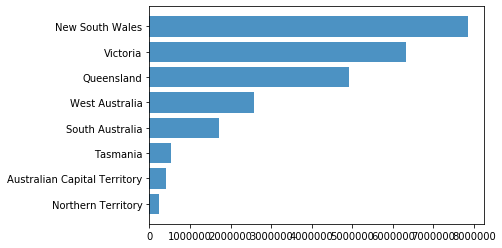

In [234]:
fig = plt.figure()

tag = list(populations_state.keys())
num = list(populations_state.values())
y_pos = np.arange(len(tag))

data = pd.DataFrame({'x':tag,'y':num})
data = data.sort_values('y')
#plt.ylim([0,5132355])
plt.barh(data['x'],data['y'],align='center',alpha=0.8)
plt.show()

In [98]:
# get population for cities
populations_city = {}
for i in range(len(records)):
    if records[i][2] in cities_rename.keys():
        populations_city[cities_rename[records[i][2]]] = records[i][3]
        
print(populations_city)

{'Sydney': '5132355', 'Melbourne': '4843781', 'Brisbane': '2413457', 'Adelaide': '1334167', 'Perth': '2039041', 'Hobart': '229088', 'Darwin': '148884'}


In [99]:
outfile = open("AU_City_Population.json","w")
json.dump(populations_city,outfile)
outfile.close()

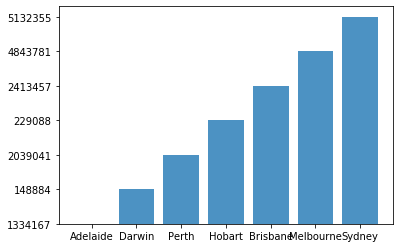

In [201]:
fig = plt.figure()

tag = list(populations_city.keys())
num = list(populations_city.values())
y_pos = np.arange(len(tag))

data = pd.DataFrame({'x':tag,'y':num})
data = data.sort_values('y')
#plt.ylim([0,5132355])
plt.bar(data['x'],data['y'],align='center',alpha=0.8)
plt.show()

In [214]:
data.head()

,x,y
3,Adelaide,1334167
6,Darwin,148884
4,Perth,2039041
5,Hobart,229088
2,Brisbane,2413457


### Income

In [2]:
incomefile = "Income_2014.csv"
records = []
with open(incomefile,"r") as file:
    reader = csv.reader(file,delimiter = ',')
    for row in reader:
        records.append(row)
    
columns = records[0]
records = records[1:]

In [256]:
print(columns)

['mean_aud', ' median_aud', ' income_aud', ' gini_coefficient_no', ' gcc_name16', ' gccsa_code_2016']


In [5]:
# get income for cities
income_city = {}
income_stat = {}
for i in range(len(records)):
    if records[i][4] in cities_rename.keys():
        income_stat['mean'] = records[i][0]
        income_stat['median'] = records[i][1]
        income_stat['total'] = records[i][2]
        income_city[cities_rename[records[i][4]]] = dict(income_stat)
        
print(income_city)

{'Sydney': {'mean': '66353', 'median': '48381', 'total': '172926801782'}, 'Melbourne': {'mean': '60467', 'median': '46363', 'total': '144873818735'}, 'Brisbane': {'mean': '60587', 'median': '47690', 'total': '74215136853'}, 'Adelaide': {'mean': '56109', 'median': '45778', 'total': '39296393081'}, 'Perth': {'mean': '70700', 'median': '53001', 'total': '80777010693'}, 'Hobart': {'mean': '53136', 'median': '44265', 'total': '6251288106'}, 'Darwin': {'mean': '68726', 'median': '59187', 'total': '5848235151'}}


In [270]:
outfile = open("AU_City_Income.json","w")
json.dump(income_city,outfile)
outfile.close()

In [257]:
state_code = {'1':'New South Wales','2':'Victoria','3':'Queensland','4':'South Australia',
              '5':'Western Australia','6':'Tasmania','7':'Northern Territory'}

In [269]:
# get income for states
income_state = {}
for i in range(len(records)):
    if records[i][5][0] in state_code.keys():
        income_state[state_code[records[i][5][0]]] =income_state.get(state_code[records[i][5][0]],0) + int(records[i][2])
        
print(income_state)

{'New South Wales': 242354471878, 'Victoria': 181575522047, 'Queensland': 144586177851, 'South Australia': 48859394933, 'Western Australia': 99225701155, 'Tasmania': 13146217387, 'Northern Territory': 7711858218}


In [271]:
outfile = open("AU_Area_Income.json","w")
json.dump(income_state,outfile)
outfile.close()

In [7]:
pop_total = []
pop_mean = []
pop_median = []
for u,v in income_city.items():
    pop_total.append(v['total'])
    pop_mean.append(v['mean'])
    pop_median.append(v['median'])
print(pop_total)
groups = list(income_city.keys())
print(groups)

['172926801782', '144873818735', '74215136853', '39296393081', '80777010693', '6251288106', '5848235151']
['Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Hobart', 'Darwin']


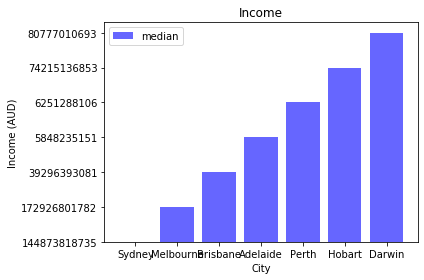

In [18]:
# data to plot
n_groups = 7

df = pd.DataFrame({'x':groups,'y1':pop_total,'y2':pop_mean,'y3':pop_median})    
df= df.sort_values('y1')
# create plot
fig, ax = plt.subplots()
index = np.arange(len(df['x']))
bar_width = 0.38
opacity = 0.6

#rects1 = plt.bar(index, df['y1'], bar_width,
#alpha=opacity,
#color='b',
#label='total')

#rects2 = plt.bar(index+ bar_width + bar_width, df['y2'], bar_width,
#alpha=opacity,
#color='g',
#label='mean')

rects2 = plt.bar(index, df['y1'],
alpha=opacity,
color='b',
label='median',align='center')

plt.xlabel('City')
plt.ylabel('Income (AUD)')
plt.title('Income')
plt.xticks(index, groups)
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
df = pd.DataFrame({'x':groups,'y1':pop_total,'y2':pop_mean,'y3':pop_median})    
df= df.sort_values('y1')
df.head()

,x,y1,y2,y3
1,Melbourne,144873818735,60467,46363
0,Sydney,172926801782,66353,48381
3,Adelaide,39296393081,56109,45778
6,Darwin,5848235151,68726,59187
5,Hobart,6251288106,53136,44265


### Education

In [272]:
edufile = "Education_2016.csv"
records = []
with open(edufile,"r") as file:
    reader = csv.reader(file,delimiter = ',')
    for row in reader:
        records.append(row)
    
columns = records[0]
records = records[1:]

In [273]:
print(columns)

['gcc_code16', ' p_lvl_educ_ns_tot', ' p_tot_tot', ' p_lvl_educ_inad_desc_tot', ' p_adv_dip_dip_total', ' gcc_name16', ' p_pguate_deg_tot', ' p_grad_dip_cer_tot', ' p_cer_tot_tot', ' p_b_deg_tot']


In [280]:
# get Education level for cities
Education_stats = {}
Education_city = {}
features = ['Not stated','Inadequate','Diploma','Postgraduate','Graduate','Certificate','Bachelor']
for i in range(len(records)):
    if records[i][5] in cities_rename.keys():
        Education_stats[features[0]] = records[i][1]
        for j in range(1,len(features)):
            if j <3:
                Education_stats[features[j]] = records[i][j+2]
            else:
                Education_stats[features[j]] = records[i][j+3] 
        Education_city[cities_rename[records[i][5]]] = dict(Education_stats)
        
#print(Education_city)

In [140]:
outfile = open("AU_City_Education.json","w")
json.dump(Education_city,outfile)
outfile.close()

In [313]:
# get education level for states
Education_parts = {}
Education_dict = {}
for i in range(len(records)):
    if records[i][0][0] in state_code.keys():
        Education_dict[features[0]] = records[i][1]
        for j in range(1,len(features)):
            if j < 3:
                Education_dict[features[j]] = records[i][j+2]
            else:
                Education_dict[features[j]] =  records[i][j+3]
        Education_parts[records[i][0]] = dict(Education_dict)
#print(Education_parts)

In [314]:
the_dict = {}
Education_state = {}
for u,v in Education_parts.items():
    for x,y in Education_parts.items():
        if u[0] == x[0] and u != x:
            for ftr in v.keys():
                the_dict[ftr] = int(v[ftr]) + int(y[ftr])
            Education_state[state_code[u[0]]] = dict(the_dict)
print(Education_state)

{'New South Wales': {'Not stated': 581265, 'Inadequate': 58060, 'Diploma': 541633, 'Postgraduate': 343722, 'Graduate': 103308, 'Certificate': 1097265, 'Bachelor': 975392}, 'Victoria': {'Not stated': 435949, 'Inadequate': 36459, 'Diploma': 442148, 'Postgraduate': 258407, 'Graduate': 117955, 'Certificate': 809029, 'Bachelor': 792561}, 'Queensland': {'Not stated': 392627, 'Inadequate': 27788, 'Diploma': 335563, 'Postgraduate': 135694, 'Graduate': 67856, 'Certificate': 814836, 'Bachelor': 497835}, 'South Australia': {'Not stated': 113197, 'Inadequate': 10766, 'Diploma': 113824, 'Postgraduate': 50695, 'Graduate': 24863, 'Certificate': 275588, 'Bachelor': 179137}, 'Western Australia': {'Not stated': 208915, 'Inadequate': 16691, 'Diploma': 178417, 'Postgraduate': 77038, 'Graduate': 38825, 'Certificate': 410642, 'Bachelor': 295724}, 'Tasmania': {'Not stated': 39855, 'Inadequate': 2797, 'Diploma': 30720, 'Postgraduate': 13320, 'Graduate': 7389, 'Certificate': 87850, 'Bachelor': 46334}, 'Norther

In [315]:
outfile = open("AU_Area_Education.json","w")
json.dump(Education_state,outfile)
outfile.close()

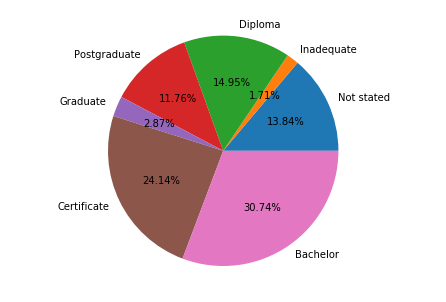

In [114]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
num_edu = list(Education_city['Sydney'].values())
ax.pie(num_edu, labels = features,autopct='%1.2f%%')
plt.show()

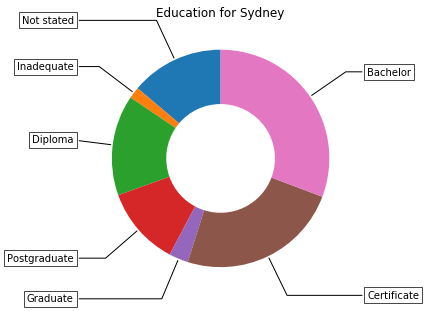

In [138]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))


data = list(Education_city['Sydney'].values())

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=90)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(features[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Education for Sydney")

plt.show()

### Life Satisfaction

In [148]:
lifefile = "LifeSatis_2016.csv"
records = []
with open(lifefile,"r") as file:
    reader = csv.reader(file,delimiter = ',')
    for row in reader:
        records.append(row)
    
columns = records[0]
records = records[1:]

In [149]:
print(columns)

[' state', ' _life_satisfaction_pc_70_synth', ' total_pop_synth', ' life_satisfaction_pc_0_to_60_synth', ' sa2_name16', ' life_satisfaction_pc_80_to_100_synth']


In [242]:
cities_rename_x = {'North Sydney - Lavender Bay':'Sydney','Brisbane City':'Brisbane',
                 'Perth City':'Perth','Hobart':'Hobart',
                 'Port Adelaide':'Adelaide','East Melbourne':'Melbourne',
                 'Darwin City':'Darwin'}  

In [243]:
# get population for cities
Life_stats = {}
Life_city = {}
features = ['Life Satisfaction70','Life Satisfaction0-60','Life Satisfaction80-100']
for i in range(len(records)):
    if records[i][4] in cities_rename_x.keys():
        Life_stats[features[0]] = records[i][1]
        Life_stats[features[1]] = records[i][3]
        Life_stats[features[2]] = records[i][5]
        Life_city[cities_rename_x[records[i][4]]] = dict(Life_stats)
        
print(Life_city)

{'Melbourne': {'Life Satisfaction70': '0.213678', 'Life Satisfaction0-60': '0.112881', 'Life Satisfaction80-100': '0.673441'}, 'Sydney': {'Life Satisfaction70': '0.221494', 'Life Satisfaction0-60': '0.11625', 'Life Satisfaction80-100': '0.662256'}, 'Brisbane': {'Life Satisfaction70': '0.247629', 'Life Satisfaction0-60': '0.182297', 'Life Satisfaction80-100': '0.570074'}, 'Adelaide': {'Life Satisfaction70': '0.218416', 'Life Satisfaction0-60': '0.181829', 'Life Satisfaction80-100': '0.599754'}, 'Perth': {'Life Satisfaction70': '0.236793', 'Life Satisfaction0-60': '0.152073', 'Life Satisfaction80-100': '0.611134'}, 'Hobart': {'Life Satisfaction70': '0.215155', 'Life Satisfaction0-60': '0.154461', 'Life Satisfaction80-100': '0.630383'}, 'Darwin': {'Life Satisfaction70': '0.202185', 'Life Satisfaction0-60': '0.12461', 'Life Satisfaction80-100': '0.673206'}}


In [151]:
outfile = open("AU_City_LifeSatisfaction.json","w")
json.dump(Life_city,outfile)
outfile.close()

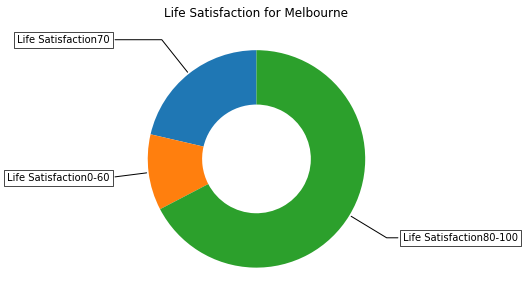

In [155]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))


data = list(Life_city['Melbourne'].values())

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=90)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.7)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(features[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Life Satisfaction for Melbourne")

plt.show()